In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from numpy import split
from sklearn.model_selection import train_test_split
import itertools
import h5py
from scipy.fft import fft, ifft 
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

#import dataset
colnames = ['power','windspeed1']
series2 = pd.read_csv('test.csv',  names = colnames)

signal = series2.power
signal = signal[:20000]



In [2]:
# Ensure the signal length is a power of 2 for FFT alignment
def align_signal_length(signal):
    n = len(signal)
    next_pow_of_2 = int(np.ceil(np.log2(n)))
    aligned_length = 2 ** next_pow_of_2
    padded_signal = np.pad(signal, (0, aligned_length - n), mode='constant')
    return padded_signal

In [3]:
aligned_signal = align_signal_length(signal)


In [4]:
frequency_spectrum = fft(aligned_signal)
# Convert the frequency spectrum to real data type
frequency_spectrum = np.real(frequency_spectrum)

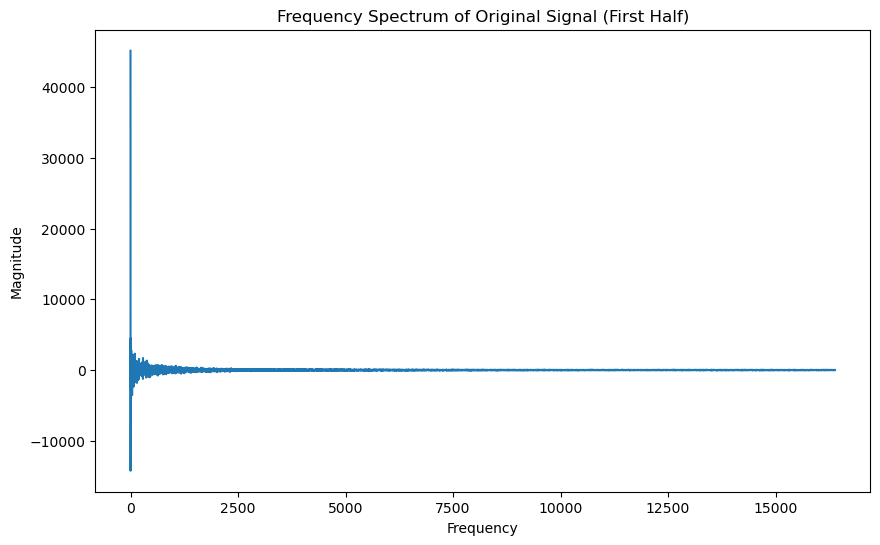

In [5]:
half_length = len(frequency_spectrum) // 2
frequency_axis = np.arange(half_length)
plt.figure(figsize=(10, 6))
plt.plot(frequency_axis, frequency_spectrum[:half_length])
plt.title('Frequency Spectrum of Original Signal (First Half)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

In [6]:


# Step 4: Add random harmonics to the original signal
def add_random_harmonics(frequency_spectrum, num_harmonics, magnitude):
    spectrum_with_harmonics = frequency_spectrum.copy()
    n = len(spectrum_with_harmonics)
    for _ in range(num_harmonics):
        harmonic_index = np.random.randint(1, n//2)  # Avoid DC component
        spectrum_with_harmonics[harmonic_index] += magnitude
    return spectrum_with_harmonics

# Step 5: Reverse FFT to get the modified signal
def inverse_fft_transform(frequency_spectrum):
    return np.real(ifft(frequency_spectrum))


In [7]:
# Step 3: Build and train an autoencoder
# Step 3: Build and train an autoencoder
# Step 3: Build and train an autoencoder
def build_autoencoder(input_dim, encoding_dim, learning_rate=0.001):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(64, activation='relu')(input_layer)
    decoded = Dense(input_dim, activation='linear')(encoded)

    optimizer = Adam(learning_rate=learning_rate)  # Specify the learning_rate parameter here

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer=optimizer, loss='mean_squared_error')
    return autoencoder




# Convert the frequency spectrum to real data type
frequency_spectrum_real = np.real(frequency_spectrum)

# Reshape the input data to match the expected shape of the autoencoder model
input_dim = len(frequency_spectrum_real)
frequency_spectrum_real_reshaped = frequency_spectrum_real.reshape(-1, input_dim)

# Build and train an autoencoder with adjusted learning rate
input_dim = len(frequency_spectrum_real)
encoding_dim = 64  # Adjust according to your data
learning_rate = 0.0001  # Adjust the learning rate as needed
autoencoder = build_autoencoder(input_dim, encoding_dim, learning_rate)
autoencoder.fit(frequency_spectrum_real_reshaped, frequency_spectrum_real_reshaped, epochs=813, batch_size=32, shuffle=True)


Epoch 1/813
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - loss: 106047.1250
Epoch 2/813
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 105793.2891
Epoch 3/813
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 105645.3047
Epoch 4/813
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 105549.1172
Epoch 5/813
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 105473.2422
Epoch 6/813
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 105399.0391
Epoch 7/813
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 105320.6953
Epoch 8/813
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 105232.9453
Epoch 9/813
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 105131.5781
Epoch 10/813
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 105013.7031
Epoch 11/813
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 104877.1562
Epoch 12/813
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 104720.0859
Epoch 13/813
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 104543.5234
Epoch 14/813
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 104346.9531
Epoch 15/813
1

In [8]:
# Reshape the frequency_spectrum_real array to match the expected input shape of the autoencoder
input_dim = len(frequency_spectrum)
frequency_spectrum_real = np.real(frequency_spectrum)
frequency_spectrum_real_reshaped = frequency_spectrum_real.reshape(-1, input_dim)

In [9]:
# Get reconstructed spectrum from autoencoder
reconstructed_spectrum = autoencoder.predict(frequency_spectrum_real_reshaped)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


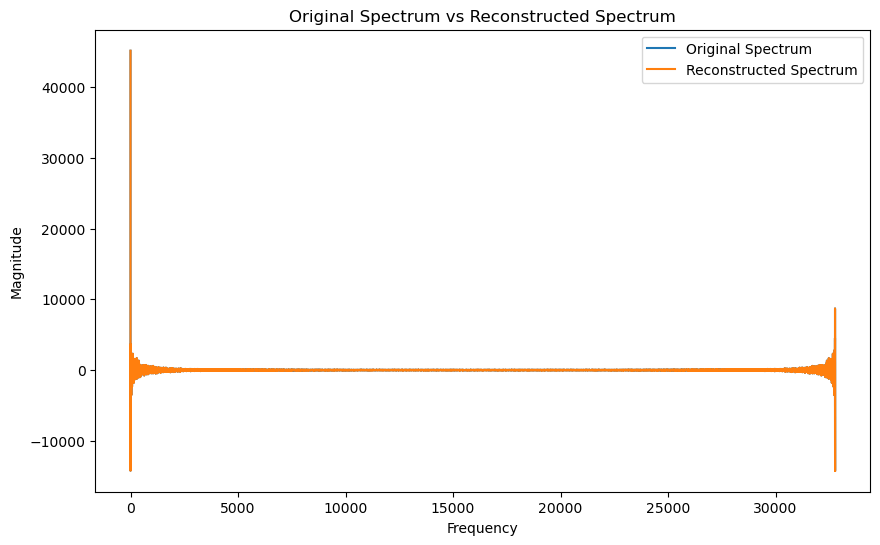

In [10]:
# Plot the original spectrum and the reconstructed spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequency_spectrum, label='Original Spectrum')
plt.plot(reconstructed_spectrum.flatten(), label='Reconstructed Spectrum')
plt.title('Original Spectrum vs Reconstructed Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

In [428]:
# Compute the mean absolute error (MAE) between the original and reconstructed spectra
mean_absolute_error = np.mean(np.abs(frequency_spectrum - reconstructed_spectrum.flatten()))

# Print the mean absolute error
print("Mean Absolute Error:", mean_absolute_error)



Mean Absolute Error: 1.5283276698884705


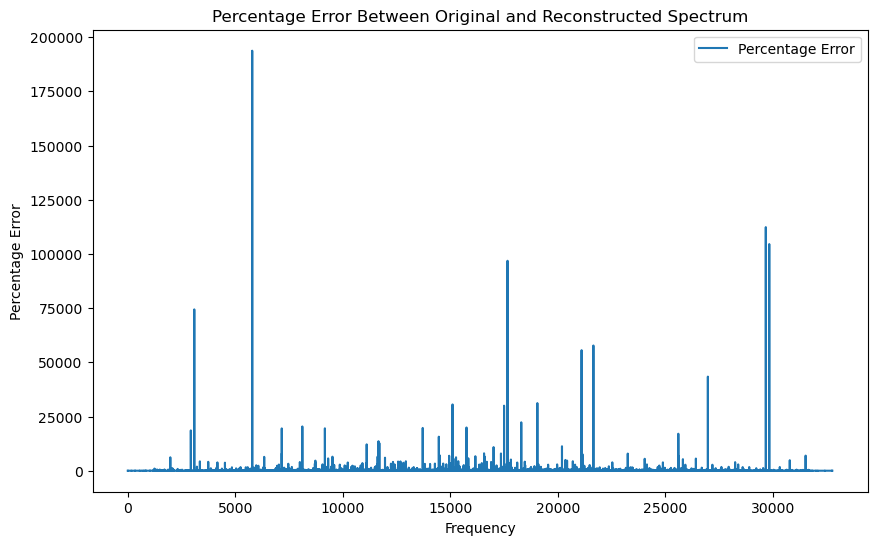

In [429]:
# Compute the percentage error between the original and reconstructed spectra
percentage_error = np.abs((frequency_spectrum - reconstructed_spectrum.flatten()) / frequency_spectrum) * 100

# Plot the percentage error
plt.figure(figsize=(10, 6))
plt.plot(percentage_error, label='Percentage Error')
plt.title('Percentage Error Between Original and Reconstructed Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Percentage Error')
plt.legend()
plt.show()

In [439]:
# Define functions for adding harmonics and inverse FFT
def add_harmonic(frequency_spectrum, harmonic_index, magnitude):
  spectrum_with_harmonic = frequency_spectrum.copy()
  spectrum_with_harmonic[0, harmonic_index] += magnitude
  return spectrum_with_harmonic

def inverse_fft_transform(frequency_spectrum):
  return np.real(ifft(frequency_spectrum))

# Replace specific frequency components with different harmonic values
harmonic_indices = list(range(10000, 10001))  # Example: specify the indices of frequency components to replace
magnitude = 1000 # Magnitude of the harmonic
modified_spectrum = frequency_spectrum_real_reshaped.copy()  # Create a copy of the original spectrum

for index in harmonic_indices:
    modified_spectrum = add_harmonic(modified_spectrum, index, magnitude)

In [440]:
# Get reconstructed spectrum from autoencoder for adjusted signal
reconstructed_modified_spectrum = autoencoder.predict(modified_spectrum)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


10


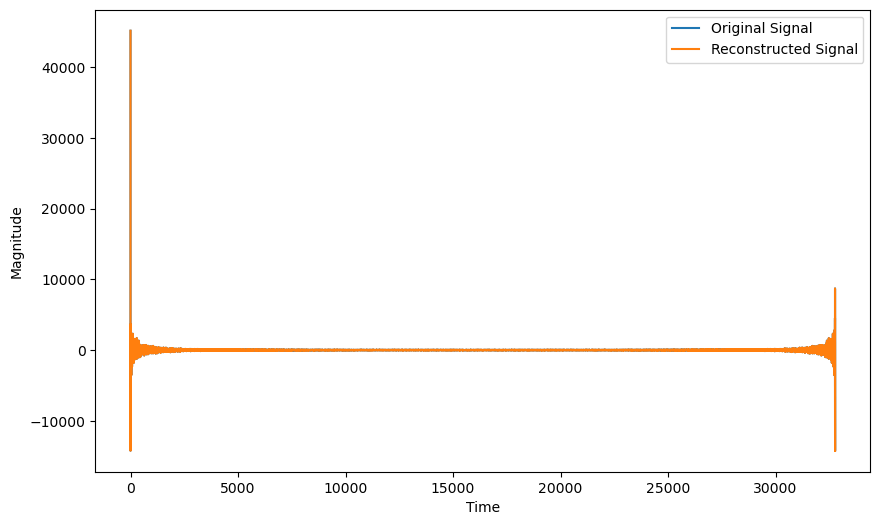

In [441]:

original_errors = np.abs(frequency_spectrum - reconstructed_spectrum.flatten())

# Calculate reconstruction errors for anomalous data
anomaly_errors = np.abs(modified_spectrum - reconstructed_modified_spectrum.flatten())
anomaly_errors = anomaly_errors.flatten()
# Determine threshold for anomaly detection (e.g., based on percentiles of original errors)
threshold = 10
# Example: 95th percentile
anomaly_errors_reshaped = anomaly_errors.reshape(modified_spectrum.shape)
#anomaly_errors = original_errors;
# Filter out any indices that are out of range of the anomaly_errors array
# Increase the error values at specific indices to force them above the threshold
invalid_indices = np.random.randint(0, len(anomaly_errors), size=100)  # Choose random indices
anomaly_errors[invalid_indices] += 50  # Increase error values at chosen indices
# = np.where(anomaly_errors_reshaped > threshold)
#valid_indices = valid_indices[valid_indices > 0]
invalid_indices_tuple = np.where(anomaly_errors<threshold)
valid_indices_tuple = np.where(anomaly_errors > threshold)
valid_indices = valid_indices_tuple[0]
invalid_indices = invalid_indices_tuple[0]

# Filter out any indices that are out of range of the anomaly_errors array
valid_indices = valid_indices[valid_indices < len(anomaly_errors)]
invalid_indices = invalid_indices[invalid_indices<len(anomaly_errors)]
# Remove the first array containing zeros
valid_indices = valid_indices[valid_indices > 0]

# Plot original signal, reconstructed signal, and anomalies
plt.figure(figsize=(10, 6))
plt.plot(frequency_spectrum, label='Original Signal')
plt.plot(reconstructed_spectrum.flatten(), label='Reconstructed Signal')
#plt.scatter(valid_indices, modified_spectrum.flatten()[valid_indices], color='red', label='Anomalies')
#plt.scatter(invalid_indices, modified_spectrum.flatten()[invalid_indices],color='blue',label='invalid anaomalies')
#plt.title('Original Signal vs Reconstructed Signal with Anomalies')
print(threshold)
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

Text(0, 0.5, 'Magnitude')

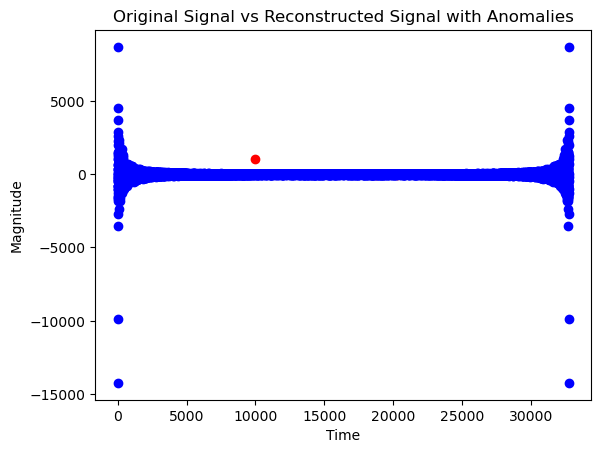

In [442]:
plt.scatter(valid_indices, modified_spectrum.flatten()[valid_indices], color='red', label='Anomalies')
plt.scatter(invalid_indices, modified_spectrum.flatten()[invalid_indices],color='blue',label='invalid anaomalies')
plt.title('Original Signal vs Reconstructed Signal with Anomalies')
plt.xlabel('Time')
plt.ylabel('Magnitude')

In [443]:
print(len(valid_indices))#number of valid anomalies

102


In [444]:
print(len(invalid_indices))#number of invalid anomalies


32665
